In [1]:
from selenium import webdriver
import pyautogui
from bs4 import BeautifulSoup
import pandas as pd
import time

ModuleNotFoundError: No module named 'selenium'

In [6]:
dtf = pd.read_csv("C:/Users/hyorim/Desktop/연구실/[논문]KTX역사분류/문화시설/철도역인근문화시설_KTX_sample.csv")
dtf

,시군구코드,시군구명,주요역,대분류,중분류,기준연도,문화시설별ID,대분류명,중분류명,시설명,시설위도,시설경도,주요역위도,주요역경도
0,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000170,문화시설,문화시설_박물관_나혼자,OCI미술관,37.573184,126.982093,37.554073,126.970702
1,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000171,문화시설,문화시설_박물관_나혼자,아트센터나비미술관,37.569651,126.980291,37.554073,126.970702
2,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000172,문화시설,문화시설_박물관_나혼자,한국색동박물관,37.573841,126.992071,37.554073,126.970702
3,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000175,문화시설,문화시설_박물관_나혼자,한국현대의상박물관,37.575461,127.005507,37.554073,126.970702
4,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000176,문화시설,문화시설_박물관_나혼자,세종문화회관 미술관(세종미술관),37.572621,126.975721,37.554073,126.970702
5,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000192,문화시설,문화시설_박물관_나혼자,서울대학교병원 의학박물관,37.577596,126.999886,37.554073,126.970702
6,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000195,문화시설,문화시설_박물관_나혼자,춘원당한방박물관,37.571463,126.990288,37.554073,126.970702
7,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000196,문화시설,문화시설_박물관_나혼자,북촌박물관,37.580432,126.984766,37.554073,126.970702
8,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000201,문화시설,문화시설_박물관_나혼자,한무숙 문학관,37.587793,126.998591,37.554073,126.970702
9,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000219,문화시설,문화시설_박물관_나혼자,상명대학교 박물관,37.610541,126.975763,37.554073,126.970702


In [9]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구코드    10 non-null     int64  
 1   시군구명     10 non-null     object 
 2   주요역      10 non-null     object 
 3   대분류      10 non-null     object 
 4   중분류      10 non-null     object 
 5   기준연도     10 non-null     int64  
 6   문화시설별ID  10 non-null     object 
 7   대분류명     10 non-null     object 
 8   중분류명     10 non-null     object 
 9   시설명      10 non-null     object 
 10  시설위도     10 non-null     float64
 11  시설경도     10 non-null     float64
 12  주요역위도    10 non-null     float64
 13  주요역경도    10 non-null     float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ KB


In [24]:
degree = str(dtf['주요역경도'][0].astype(int))
minutes = str(((dtf['주요역경도'][0] - dtf['주요역경도'][0].astype(int))*60).astype(int))
seconds = ((dtf['주요역경도'][0] - dtf['주요역경도'][0].astype(int))*60 - ((dtf['주요역경도'][0] - dtf['주요역경도'][0].astype(int))*60).astype(int)) * 60
lon = degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"E "

degree = str(dtf['주요역위도'][0].astype(int))
minutes = str(((dtf['주요역위도'][0] - dtf['주요역위도'][0].astype(int))*60).astype(int))
seconds = ((dtf['주요역위도'][0] - dtf['주요역위도'][0].astype(int))*60 - ((dtf['주요역위도'][0] - dtf['주요역위도'][0].astype(int))*60).astype(int)) * 60
lat = degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"N"
print(lon + lat)

126°58'14.53"E 37°33'14.66"N


In [25]:
degree = str(dtf['시설경도'][0].astype(int))
minutes = str(((dtf['시설경도'][0] - dtf['시설경도'][0].astype(int))*60).astype(int))
seconds = ((dtf['시설경도'][0] - dtf['시설경도'][0].astype(int))*60 - ((dtf['시설경도'][0] - dtf['시설경도'][0].astype(int))*60).astype(int)) * 60
lon = degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"E "

degree = str(dtf['시설위도'][0].astype(int))
minutes = str(((dtf['시설위도'][0] - dtf['시설위도'][0].astype(int))*60).astype(int))
seconds = ((dtf['시설위도'][0] - dtf['시설위도'][0].astype(int))*60 - ((dtf['시설위도'][0] - dtf['시설위도'][0].astype(int))*60).astype(int)) * 60
lat = degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"N"
print(lon + lat)

126°58'55.53"E 37°34'23.46"N


In [32]:
def lon_degree_dms(data):
    degree = str(int(data))
    minutes = str(int((data - int(data))*60))
    seconds = ((data - int(data))*60 - int((data - int(data))*60)) * 60

    return degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"E "

In [35]:
def lat_degree_dms(data):
    degree = str(int(data))
    minutes = str(int((data - int(data))*60))
    seconds = ((data - int(data))*60 - int((data - int(data))*60)) * 60

    return degree + '°' + minutes + "'" + str(round(seconds, 2)) + "\"N "

In [34]:
dtf['주요역경도_dms'] = dtf['주요역경도'].apply(lon_degree_dms)
dtf['시설경도_dms'] = dtf['시설경도'].apply(lon_degree_dms)

In [36]:
dtf['주요역위도_dms'] = dtf['주요역위도'].apply(lat_degree_dms)
dtf['시설위도_dms'] = dtf['시설위도'].apply(lat_degree_dms)

In [40]:
dtf['주요역경위도_dms'] = dtf['주요역경도_dms'] + dtf['주요역위도_dms']
dtf['시설경위도_dms'] = dtf['시설경도_dms'] + dtf['시설위도_dms']

In [41]:
dtf

,시군구코드,시군구명,주요역,대분류,중분류,기준연도,문화시설별ID,대분류명,중분류명,시설명,시설위도,시설경도,주요역위도,주요역경도,주요역경도_dms,시설경도_dms,주요역위도_dms,시설위도_dms,주요역경위도_dms,시설경위도_dms
0,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000170,문화시설,문화시설_박물관_나혼자,OCI미술관,37.573184,126.982093,37.554073,126.970702,"126°58'14.53""E","126°58'55.53""E","37°33'14.66""N","37°34'23.46""N","126°58'14.53""E 37°33'14.66""N","126°58'55.53""E 37°34'23.46""N"
1,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000171,문화시설,문화시설_박물관_나혼자,아트센터나비미술관,37.569651,126.980291,37.554073,126.970702,"126°58'14.53""E","126°58'49.05""E","37°33'14.66""N","37°34'10.74""N","126°58'14.53""E 37°33'14.66""N","126°58'49.05""E 37°34'10.74""N"
2,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000172,문화시설,문화시설_박물관_나혼자,한국색동박물관,37.573841,126.992071,37.554073,126.970702,"126°58'14.53""E","126°59'31.46""E","37°33'14.66""N","37°34'25.83""N","126°58'14.53""E 37°33'14.66""N","126°59'31.46""E 37°34'25.83""N"
3,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000175,문화시설,문화시설_박물관_나혼자,한국현대의상박물관,37.575461,127.005507,37.554073,126.970702,"126°58'14.53""E","127°0'19.83""E","37°33'14.66""N","37°34'31.66""N","126°58'14.53""E 37°33'14.66""N","127°0'19.83""E 37°34'31.66""N"
4,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000176,문화시설,문화시설_박물관_나혼자,세종문화회관 미술관(세종미술관),37.572621,126.975721,37.554073,126.970702,"126°58'14.53""E","126°58'32.6""E","37°33'14.66""N","37°34'21.43""N","126°58'14.53""E 37°33'14.66""N","126°58'32.6""E 37°34'21.43""N"
5,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000192,문화시설,문화시설_박물관_나혼자,서울대학교병원 의학박물관,37.577596,126.999886,37.554073,126.970702,"126°58'14.53""E","126°59'59.59""E","37°33'14.66""N","37°34'39.34""N","126°58'14.53""E 37°33'14.66""N","126°59'59.59""E 37°34'39.34""N"
6,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000195,문화시설,문화시설_박물관_나혼자,춘원당한방박물관,37.571463,126.990288,37.554073,126.970702,"126°58'14.53""E","126°59'25.04""E","37°33'14.66""N","37°34'17.27""N","126°58'14.53""E 37°33'14.66""N","126°59'25.04""E 37°34'17.27""N"
7,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000196,문화시설,문화시설_박물관_나혼자,북촌박물관,37.580432,126.984766,37.554073,126.970702,"126°58'14.53""E","126°59'5.16""E","37°33'14.66""N","37°34'49.56""N","126°58'14.53""E 37°33'14.66""N","126°59'5.16""E 37°34'49.56""N"
8,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000201,문화시설,문화시설_박물관_나혼자,한무숙 문학관,37.587793,126.998591,37.554073,126.970702,"126°58'14.53""E","126°59'54.93""E","37°33'14.66""N","37°35'16.05""N","126°58'14.53""E 37°33'14.66""N","126°59'54.93""E 37°35'16.05""N"
9,11110,종로구,서울역 경부선(고속철도),나홀로,나혼자문화생활,2020,KCOPCPO20N000000219,문화시설,문화시설_박물관_나혼자,상명대학교 박물관,37.610541,126.975763,37.554073,126.970702,"126°58'14.53""E","126°58'32.75""E","37°33'14.66""N","37°36'37.95""N","126°58'14.53""E 37°33'14.66""N","126°58'32.75""E 37°36'37.95""N"


In [7]:
durations = []

In [ ]:
start_point = 37.554073,126.970702
end_point = 37.573184,126.982093

driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://map.naver.com/v5/directions/-/-/-/transit?c=14107103.1786139,4494701.9630842,15,0,0,0,dh')
delay = 3
driver.implicitly_wait(delay)
driver.find_element_by_id('directionStart0').send_keys(start_point)
time.sleep(0.02)
pyautogui.press('enter')
time.sleep(0.3)
driver.find_element_by_id('directionGoal1').send_keys(end_point)
time.sleep(0.02)
pyautogui.press('enter')
time.sleep(0.3)
driver.find_element_by_xpath('//*[@id="container"]/shrinkable-layout/div/directions-layout/directions-result/div[1]/div[1]/directions-search/div[2]/button[2]').click()
time.sleep(0.4)    
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
print(soup)
score_result = soup.find("span", {"class": "value ng-star-inserted"})
time.sleep(1) 
duration = score_result.text
print(duration)
durations.append(duration)
driver.quit()

<html lang="ko"><head>
<title>길찾기 - 네이버 지도</title>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요." name="description"/>
<meta content="AO_6MCsaxSfiydw-JSF8cCpFrYPwZDiEo40pMwIwl7Q" name="google-site-verification"/>
<meta content="website" property="og:type"/>
<meta content="네이버 지도" property="og:site_name"/>
<meta content="네이버 지도" property="og:title"/>
<meta content="https://map.pstatic.net/res/file/content/global/static/naver/og_map.png" property="og:image"/>
<meta content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결 한 새로
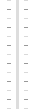
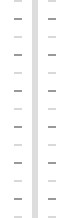
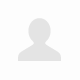
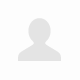

AttributeError: 'NoneType' object has no attribute 'text'

In [42]:
for index, row in dtf.iterrows():
    start_point = row['시설경위도_dms']
    end_point = row['주요역경위도_dms']

    driver = webdriver.Chrome('chromedriver.exe')
    driver.get('https://map.naver.com/v5/directions/-/-/-/transit?c=14107103.1786139,4494701.9630842,15,0,0,0,dh')
    delay = 3
    driver.implicitly_wait(delay)
    driver.find_element_by_id('directionStart0').send_keys(start_point)
    time.sleep(0.02)
    pyautogui.press('enter')
    time.sleep(0.3)
    driver.find_element_by_id('directionGoal1').send_keys(end_point)
    time.sleep(0.02)
    pyautogui.press('enter')
    time.sleep(0.3)
    driver.find_element_by_xpath('//*[@id="container"]/shrinkable-layout/div/directions-layout/directions-result/div[1]/div[1]/directions-search/div[2]/button[2]').click()
    time.sleep(0.4)    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    print(soup)
    score_result = soup.find("span", {"class": "value ng-star-inserted"})
    time.sleep(1) 
    duration = score_result.text
    print(duration)
    durations.append(duration)
    driver.quit()
